In [ ]:
import pandas as pd

# File paths provided
ai_df_path = '/content/Updated_AILexi2_Filled_Sentiments.xlsx'
lexi_df_path = '/content/FinalLexiconForProcessing.xlsx'
training_sentences_path = '/content/Updated_AILexi2_Filled_Sentiments.xlsx'

# Reading the Excel files
ai_df = pd.read_excel(ai_df_path)
lexi_df = pd.read_excel(lexi_df_path)
training_sentences = pd.read_excel(training_sentences_path)

# Displaying the first few rows of each DataFrame
print(ai_df.head())
print(lexi_df.head())
print(training_sentences.head())


     ANCAIS  Unnamed: 1  SCORE  Unnamed: 3 SENTIMENT  Unnamed: 5   NATURE  \
0        un         NaN      0         NaN    Neutre         NaN   Nombre   
1  beaucoup         NaN      3         NaN   Positif         NaN      Mot   
2  beaucoup         NaN      0         NaN    Neutre         NaN  Adverbe   
3   abandon         NaN      3         NaN   Positif         NaN      Mot   
4   abandon         NaN      4         NaN   Positif         NaN      Mot   

   Unnamed: 7   English_ai  Unnamed: 9  ...  Unnamed: 12   Zulu_ai  \
0         NaN          one         NaN  ...          NaN    eyodwa   
1         NaN        a lot         NaN  ...          NaN  okuningi   
2         NaN        a lot         NaN  ...          NaN  okuningi   
3         NaN  abandonment         NaN  ...          NaN   ukuyeka   
4         NaN  Abandonment         NaN  ...          NaN   ukuyeka   

   Unnamed: 14 Unnamed: 15  Sepedi_ai  Sentiment_English Sentiment_Afrikaans  \
0          NaN         NaN        te

In [ ]:
# Dropping columns that are mostly 'Unnamed' or contain NaN values
cleaned_ai_df = ai_df.dropna(axis=1, how='all')  # Drop columns where all values are NaN
cleaned_ai_df.columns = cleaned_ai_df.columns.str.strip()  # Remove leading/trailing spaces from column names

# Display the cleaned DataFrame
print(cleaned_ai_df.head())


     ANCAIS  SCORE SENTIMENT   NATURE   English_ai Afrikaans_ai   Zulu_ai  \
0        un      0    Neutre   Nombre          one          een    eyodwa   
1  beaucoup      3   Positif      Mot        a lot         baie  okuningi   
2  beaucoup      0    Neutre  Adverbe        a lot         baie  okuningi   
3   abandon      3   Positif      Mot  abandonment      verlaat   ukuyeka   
4   abandon      4   Positif      Mot  Abandonment      verlaat   ukuyeka   

   Sepedi_ai  Sentiment_English  Sentiment_Afrikaans Sentiment_Zulu  \
0        tee                  0                    0              0   
1     boholo                  4                    4              5   
2     boholo                  0                    0              0   
3  go boaela                  4                    4              5   
4  go boaela                  5                    5              6   

  Sentiment_Sepedi  FRANCAIS  
0                0        un  
1                4  beaucoup  
2                

In [ ]:
# Displaying the columns for both DataFrames
print("Columns in AI Lexicon DataFrame:")
print(ai_df.columns)

print("\nColumns in Lexicon DataFrame:")
print(lexi_df.columns)

Columns in AI Lexicon DataFrame:
Index(['ANCAIS', 'Unnamed: 1', 'SCORE', 'Unnamed: 3', 'SENTIMENT',
       'Unnamed: 5', 'NATURE', 'Unnamed: 7', 'English_ai', 'Unnamed: 9',
       'Unnamed: 10', 'Afrikaans_ai', 'Unnamed: 12', 'Zulu_ai', 'Unnamed: 14',
       'Unnamed: 15', 'Sepedi_ai', 'Sentiment_English', 'Sentiment_Afrikaans',
       'Sentiment_Zulu', 'Sentiment_Sepedi', 'FRANCAIS'],
      dtype='object')

Columns in Lexicon DataFrame:
Index(['CILUBA', 'FRANCAIS', 'ENGLISH', 'AFRIKAANS', 'ZULU', 'SCORE',
       'SENTIMENT', 'NATURE', 'Sepedi'],
      dtype='object')


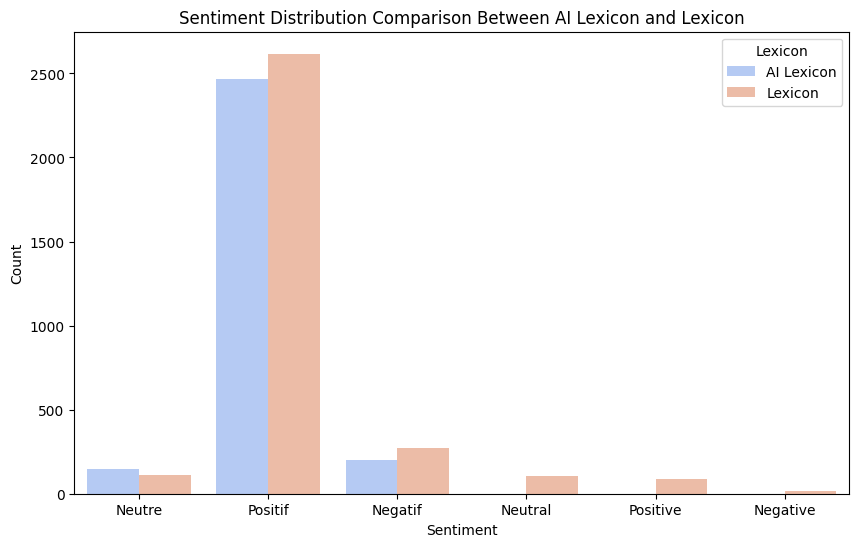

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Label the datasets to distinguish them in the plot
ai_df['Lexicon'] = 'AI Lexicon'
lexi_df['Lexicon'] = 'Lexicon'

# Concatenate the two DataFrames for comparison
combined_df = pd.concat([ai_df[['SENTIMENT', 'Lexicon']], lexi_df[['SENTIMENT', 'Lexicon']]])

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='SENTIMENT', hue='Lexicon', palette='coolwarm')
plt.title('Sentiment Distribution Comparison Between AI Lexicon and Lexicon')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()


Looking only at the Lexicon Generated by the API


<ipython-input-6-9cad121c9f2b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lexi_df, x='SENTIMENT', palette='coolwarm')


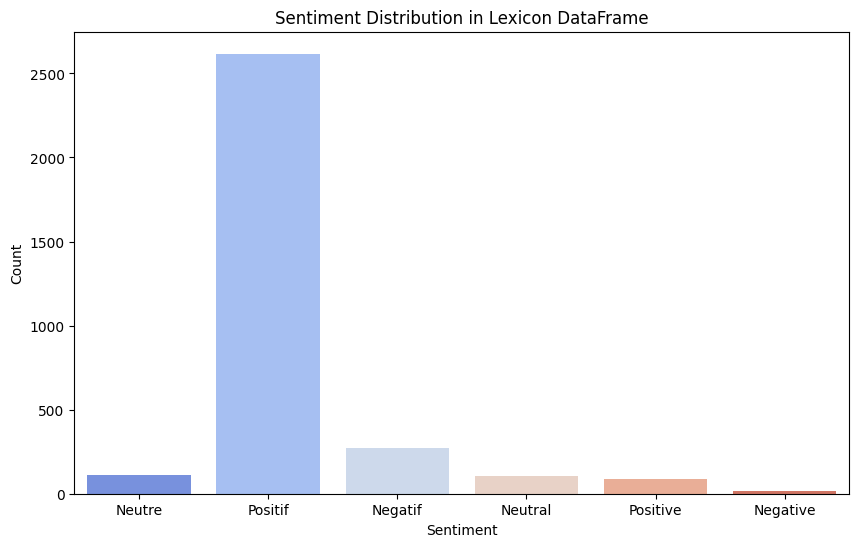

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=lexi_df, x='SENTIMENT', palette='coolwarm')
plt.title('Sentiment Distribution in Lexicon DataFrame')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()


<ipython-input-7-3f36c7fe459e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=lexi_df, x='SENTIMENT', palette='coolwarm')


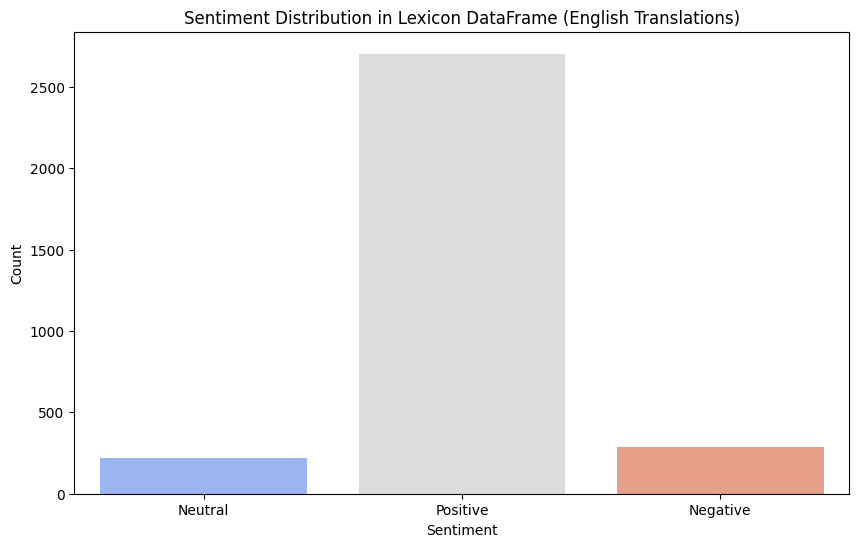

In [ ]:
# Create a mapping dictionary from French to English sentiments
sentiment_mapping = {
    'Positif': 'Positive',
    'Negatif': 'Negative',
    'Neutre': 'Neutral',
    'Positive': 'Positive',  # already in English
    'Negative': 'Negative',  # already in English
    'Neutral': 'Neutral'     # already in English
}

# Apply the mapping to the 'SENTIMENT' column
lexi_df['SENTIMENT'] = lexi_df['SENTIMENT'].map(sentiment_mapping)

# Plot the updated sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=lexi_df, x='SENTIMENT', palette='coolwarm')
plt.title('Sentiment Distribution in Lexicon DataFrame (English Translations)')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()


<ipython-input-57-75e5011a4138>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lexi_word_freq_df, x='Frequency', y='Word', palette='Blues_d')


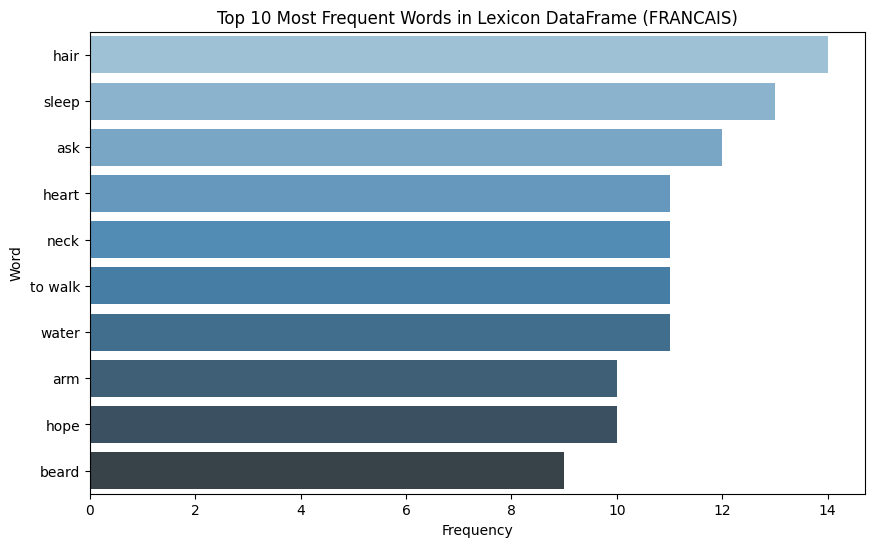

In [ ]:
from collections import Counter

# Get word frequencies for the 'FRANCAIS' column
lexi_word_freq = Counter(lexi_df['ENGLISH'].dropna())

# Convert to DataFrame for visualization
lexi_word_freq_df = pd.DataFrame(lexi_word_freq.items(), columns=['Word', 'Frequency']).nlargest(10, 'Frequency')

# Plot word frequencies
plt.figure(figsize=(10, 6))
sns.barplot(data=lexi_word_freq_df, x='Frequency', y='Word', palette='Blues_d')
plt.title('Top 10 Most Frequent Words in Lexicon DataFrame (FRANCAIS)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


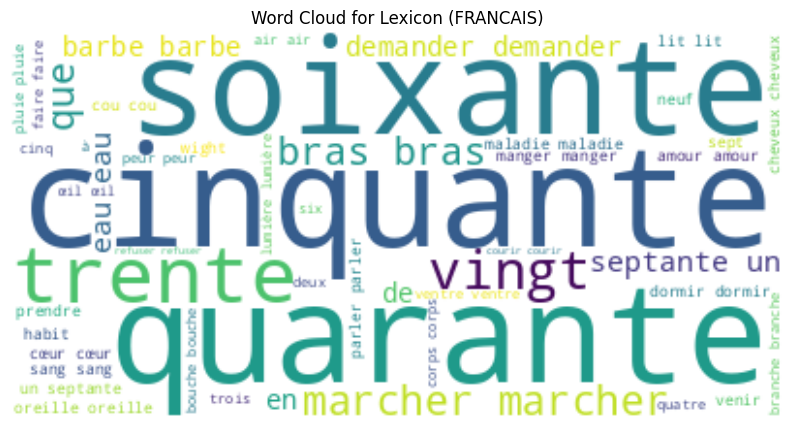

In [ ]:
from wordcloud import WordCloud


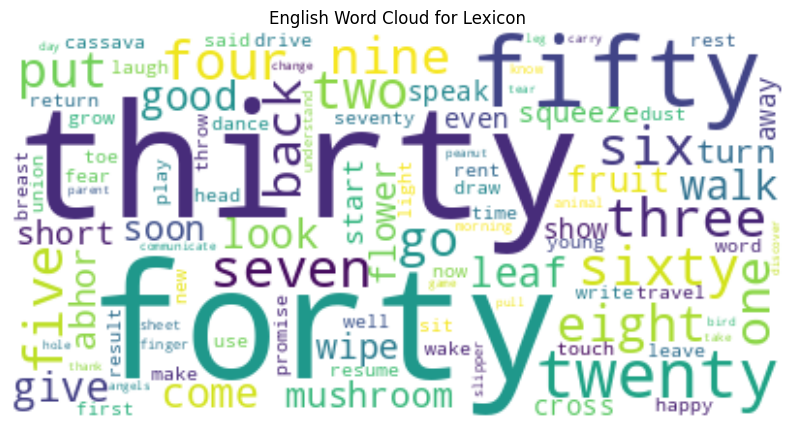

In [ ]:
# Remove duplicates by converting to lowercase and using a set
english_text = ' '.join(set(lexi_df['ENGLISH'].dropna().str.lower()))

# Generate the word cloud
wordcloud_english = WordCloud(background_color='white', max_words=100, contour_color='steelblue').generate(english_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_english, interpolation='bilinear')
plt.title('English Word Cloud for Lexicon')
plt.axis('off')
plt.show()


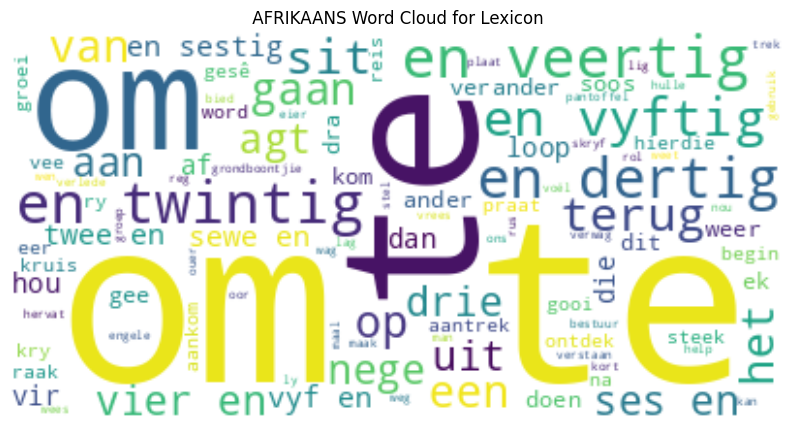

In [ ]:
# Remove duplicates by converting to lowercase and using a set
afrikaans_text = ' '.join(set(lexi_df['AFRIKAANS'].dropna().str.lower()))

# Generate the word cloud
wordcloud_afrikaans = WordCloud(background_color='white', max_words=100, contour_color='steelblue').generate(afrikaans_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_afrikaans, interpolation='bilinear')
plt.title(' AFRIKAANS Word Cloud for Lexicon ')
plt.axis('off')
plt.show()


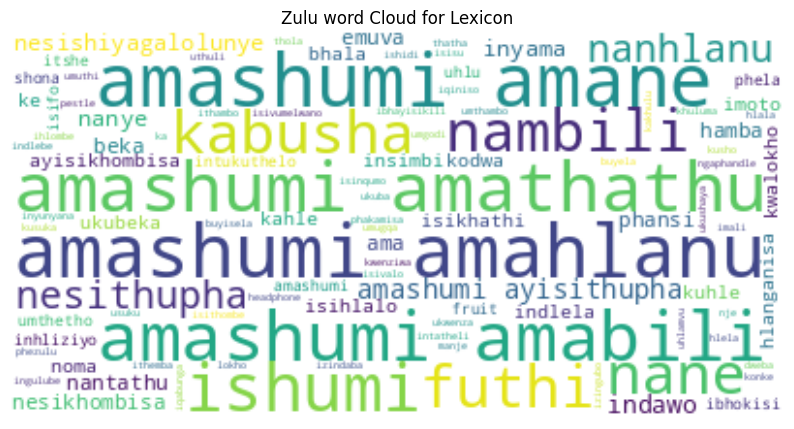

In [ ]:
# Remove duplicates by converting to lowercase and using a set
zulu_text = ' '.join(set(lexi_df['ZULU'].dropna().str.lower()))

# Generate the word cloud
wordcloud_zulu = WordCloud(background_color='white', max_words=100, contour_color='steelblue').generate(zulu_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_zulu, interpolation='bilinear')
plt.title('Zulu word Cloud for Lexicon')
plt.axis('off')
plt.show()


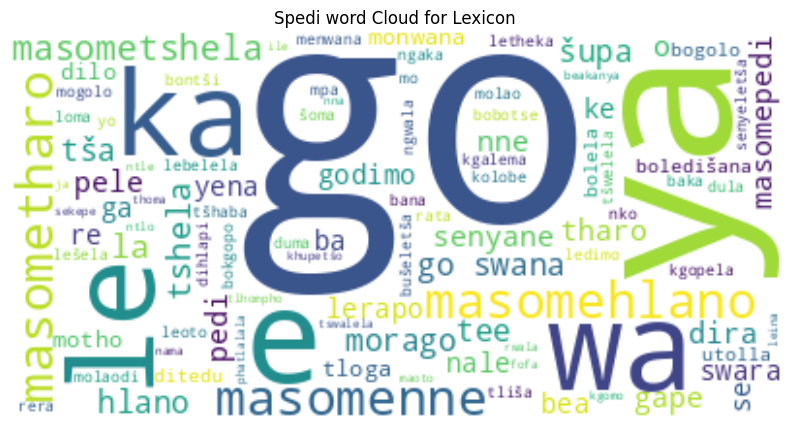

In [ ]:
# Remove duplicates by converting to lowercase and using a set
sepedi_text = ' '.join(set(lexi_df['Sepedi'].dropna().str.lower()))

# Generate the word cloud
wordcloud_sepedi = WordCloud(background_color='white', max_words=100, contour_color='steelblue').generate(sepedi_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_sepedi, interpolation='bilinear')
plt.title('Spedi word Cloud for Lexicon ')
plt.axis('off')
plt.show()


In [ ]:
# Cross-tabulation between NATURE (POS) and SENTIMENT
pos_sentiment_crosstab = pd.crosstab(lexi_df['NATURE'], lexi_df['SENTIMENT'])

# Display the cross-tabulation
print(pos_sentiment_crosstab)


SENTIMENT        Negative  Neutral  Positive
NATURE                                      
adjectif                0        4         3
adverb                  0        1         3
adverbe                 1       10        13
article                 0        8         0
conjoction              0        1         0
conjunction             2       27         6
mot                   180       28      1802
nombre                  0       80         1
pronompersonnel         0       24         0
verbe                 107       34       876


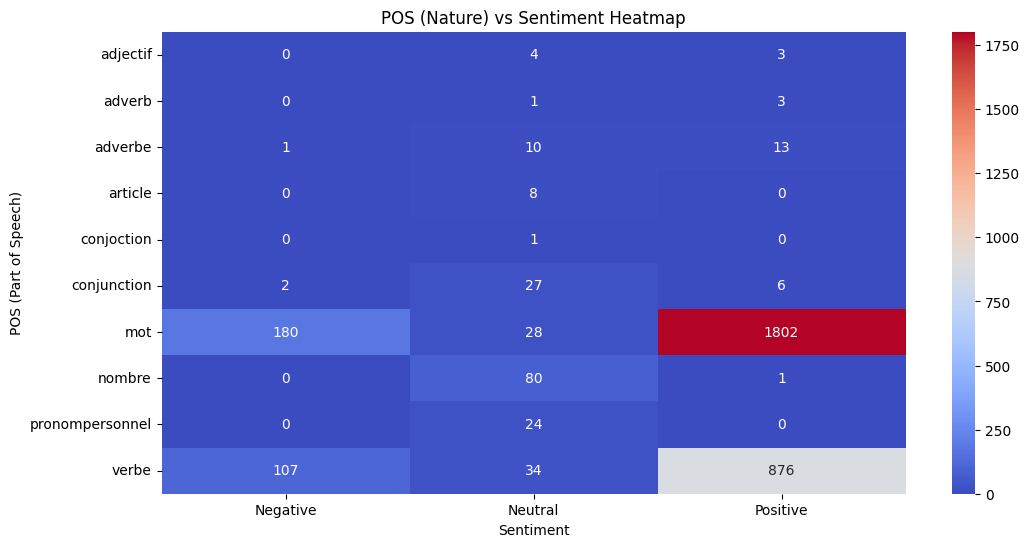

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(pos_sentiment_crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('POS (Nature) vs Sentiment Heatmap')
plt.ylabel('POS (Part of Speech)')
plt.xlabel('Sentiment')
plt.show()


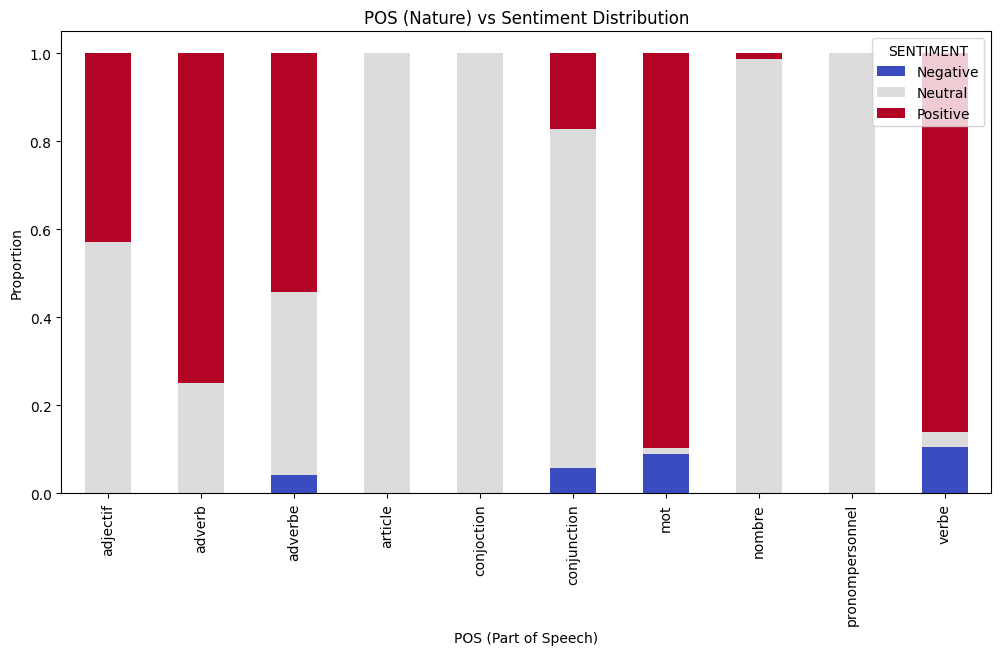

In [ ]:
# Normalizing the cross-tab for better visualization
pos_sentiment_normalized = pos_sentiment_crosstab.div(pos_sentiment_crosstab.sum(1), axis=0)

# Stacked bar plot
pos_sentiment_normalized.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('POS (Nature) vs Sentiment Distribution')
plt.ylabel('Proportion')
plt.xlabel('POS (Part of Speech)')
plt.show()


CHI-squared test of independece

In [ ]:
from scipy.stats import chi2_contingency

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(pos_sentiment_crosstab)

# Display the p-value
print(f"Chi-Square Test p-value: {p}")


Chi-Square Test p-value: 0.0


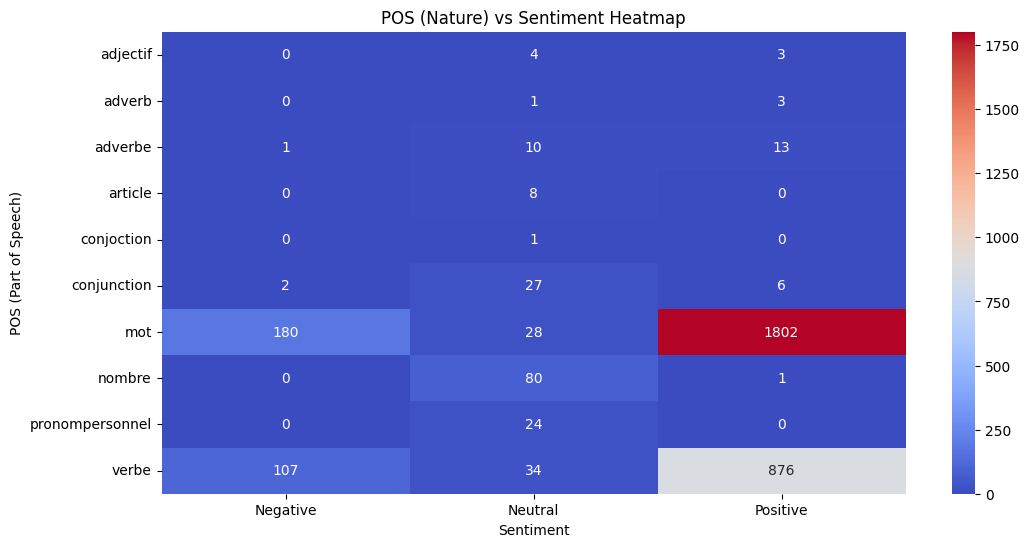

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(pos_sentiment_crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('POS (Nature) vs Sentiment Heatmap')
plt.ylabel('POS (Part of Speech)')
plt.xlabel('Sentiment')
plt.show()


In [ ]:
# Display top POS for each sentiment
for sentiment in pos_sentiment_crosstab.columns:
    top_pos_for_sentiment = pos_sentiment_crosstab[sentiment].nlargest(5)
    print(f"Top POS tags for sentiment '{sentiment}':")
    print(top_pos_for_sentiment)
    print()


Top POS tags for sentiment 'Negative':
NATURE
mot            180
verbe          107
conjunction      2
adverbe          1
adjectif         0
Name: Negative, dtype: int64

Top POS tags for sentiment 'Neutral':
NATURE
nombre             80
verbe              34
mot                28
conjunction        27
pronompersonnel    24
Name: Neutral, dtype: int64

Top POS tags for sentiment 'Positive':
NATURE
mot            1802
verbe           876
adverbe          13
conjunction       6
adjectif          3
Name: Positive, dtype: int64



In [ ]:
# Create a mapping from French POS tags to English
pos_translation = {
    'adjectif': 'adjective',
    'adverbe': 'adverb',
    'mot': 'noun',
    'nombre': 'number',
    'verbe': 'verb',
    'pronompersonnel': 'pronoun',
    'article': 'article',
    'conjonction': 'conjunction',
    'conjunction': 'conjunction'  # There seems to be a duplicate in your data
}

# Apply the mapping to the 'NATURE' (POS) column
lexi_df['NATURE'] = lexi_df['NATURE'].map(pos_translation)

# Display the updated POS (NATURE) column
print(lexi_df['NATURE'].unique())


['number' 'noun' 'adverb' 'verb' 'adjective' nan 'pronoun' 'article'
 'conjunction']


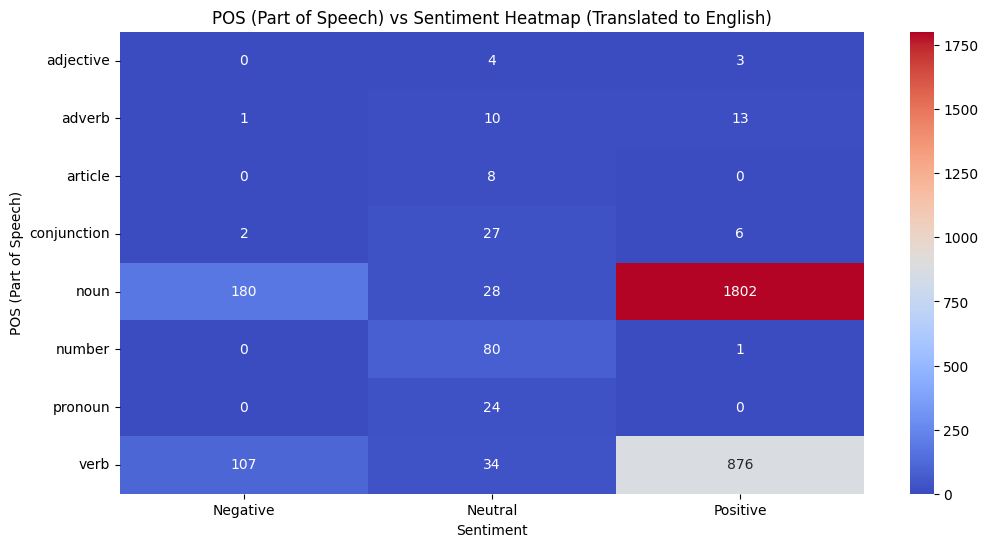

In [ ]:
# Cross-tabulation between translated POS and Sentiment
pos_sentiment_crosstab = pd.crosstab(lexi_df['NATURE'], lexi_df['SENTIMENT'])

# Heatmap for translated POS vs. Sentiment
plt.figure(figsize=(12, 6))
sns.heatmap(pos_sentiment_crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('POS (Part of Speech) vs Sentiment Heatmap (Translated to English)')
plt.ylabel('POS (Part of Speech)')
plt.xlabel('Sentiment')
plt.show()


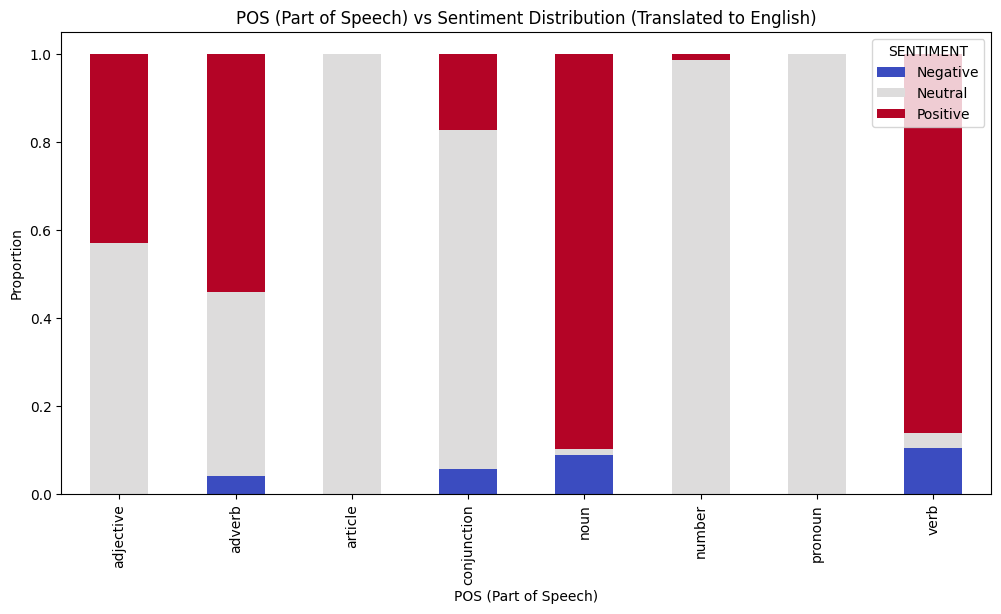

In [ ]:
# Normalizing the cross-tab for better visualization
pos_sentiment_normalized = pos_sentiment_crosstab.div(pos_sentiment_crosstab.sum(1), axis=0)

# Stacked bar plot with translated POS
pos_sentiment_normalized.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('POS (Part of Speech) vs Sentiment Distribution (Translated to English)')
plt.ylabel('Proportion')
plt.xlabel('POS (Part of Speech)')
plt.show()


<ipython-input-30-e0be995ee151>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=lexi_df, x='NATURE', y='SCORE', palette='coolwarm')


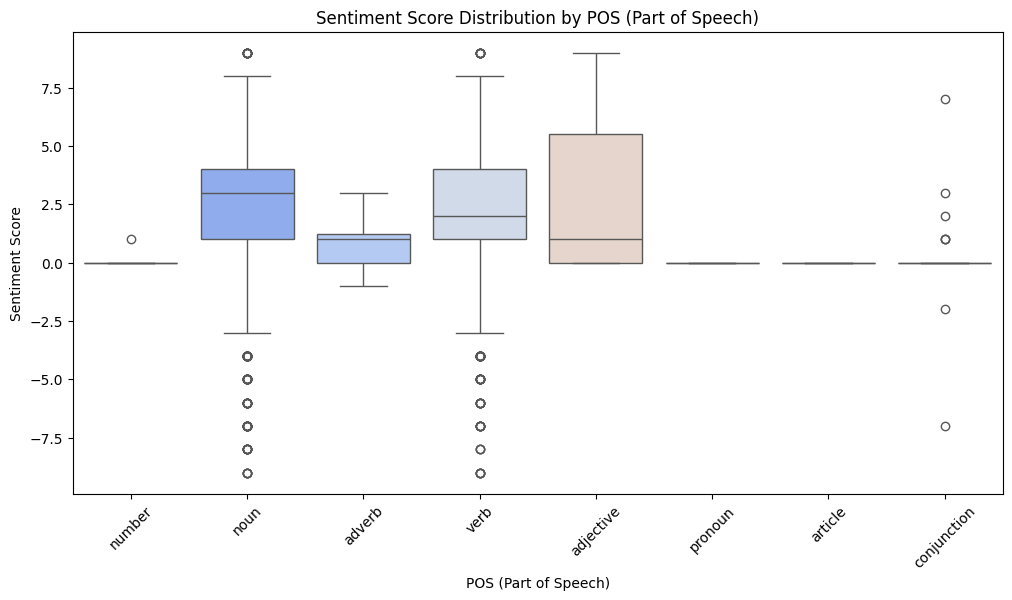

In [ ]:
# Assuming there's a numerical sentiment score (if not, you can adjust the column name or map the sentiment categories)
plt.figure(figsize=(12, 6))
sns.boxplot(data=lexi_df, x='NATURE', y='SCORE', palette='coolwarm')
plt.title('Sentiment Score Distribution by POS (Part of Speech)')
plt.xlabel('POS (Part of Speech)')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


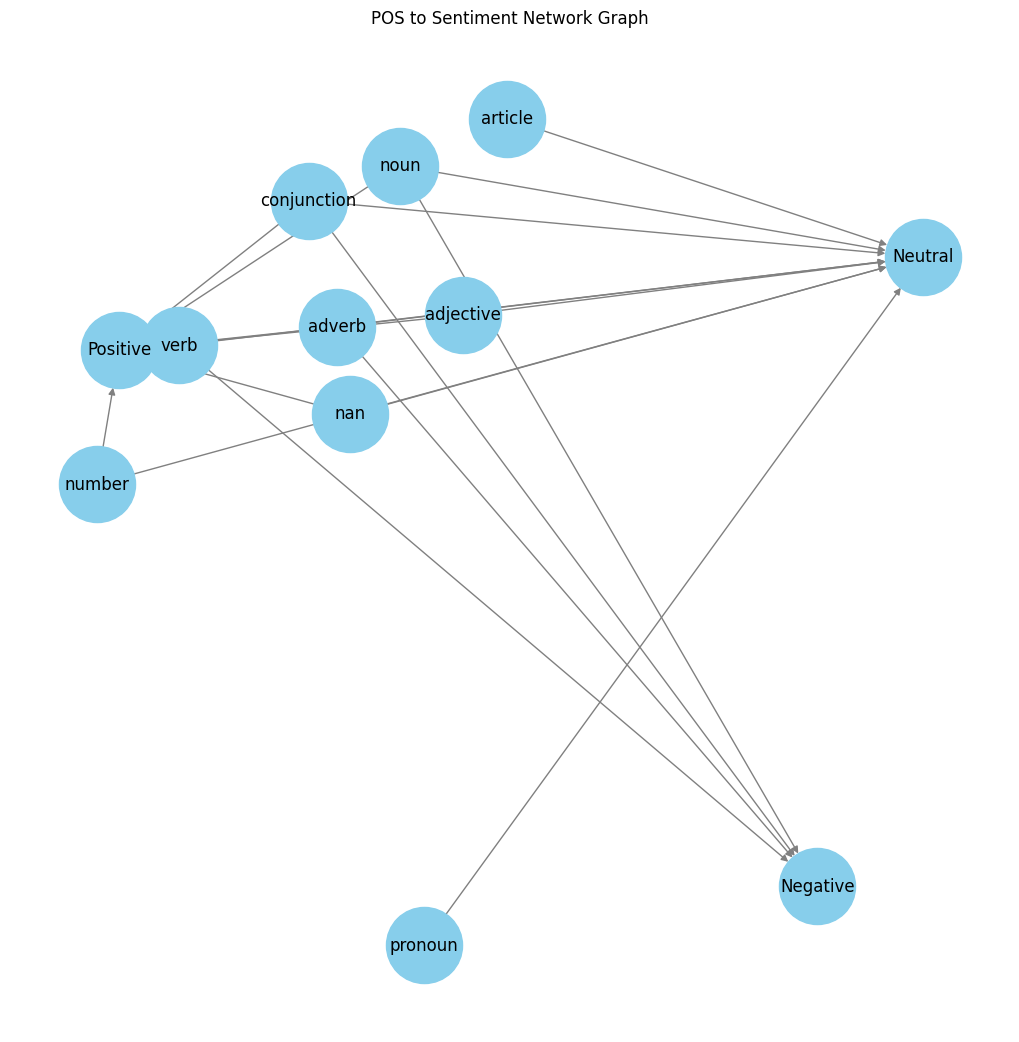

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on POS and Sentiment (this example assumes you have a relevant structure for edges)
for index, row in lexi_df.iterrows():
    G.add_edge(row['NATURE'], row['SENTIMENT'], weight=row['SCORE'])

# Draw the network graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", edge_color="gray")
plt.title('POS to Sentiment Network Graph')
plt.show()


In [ ]:
!pip install squarify


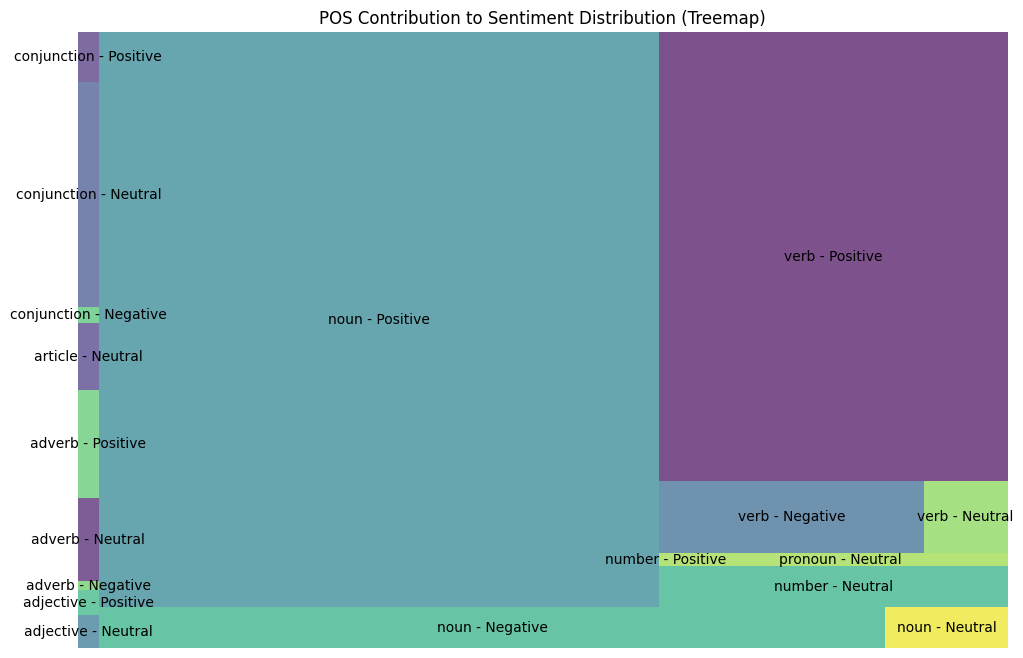

In [ ]:
import squarify
import matplotlib.pyplot as plt

# Prepare data for treemap (POS by sentiment count)
pos_sentiment_counts = lexi_df.groupby('NATURE')['SENTIMENT'].value_counts().unstack().fillna(0)

# Flatten into a list of values and labels, excluding zero-sized categories
sizes = pos_sentiment_counts.values.flatten()
labels = [f"{pos} - {sentiment}" for pos in pos_sentiment_counts.index for sentiment in pos_sentiment_counts.columns]

# Filter out zero sizes
filtered_sizes = [size for size in sizes if size > 0]
filtered_labels = [label for i, label in enumerate(labels) if sizes[i] > 0]

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=filtered_sizes, label=filtered_labels, alpha=0.7)
plt.title('POS Contribution to Sentiment Distribution (Treemap)')
plt.axis('off')
plt.show()



Visualising The Lexicon With the Sentiment for the different Languages

In [ ]:

ai_df.head()

,ANCAIS,Unnamed: 1,SCORE,Unnamed: 3,SENTIMENT,Unnamed: 5,NATURE,Unnamed: 7,English_ai,Unnamed: 9,...,Zulu_ai,Unnamed: 14,Unnamed: 15,Sepedi_ai,Sentiment_English,Sentiment_Afrikaans,Sentiment_Zulu,Sentiment_Sepedi,FRANCAIS,Lexicon
0,un,NaN,0,NaN,Neutre,NaN,NaN,NaN,one,NaN,...,eyodwa,NaN,NaN,tee,0,0,0,0,un,AI Lexicon
1,beaucoup,NaN,3,NaN,Positif,NaN,NaN,NaN,a lot,NaN,...,okuningi,NaN,NaN,boholo,4,4,5,4,beaucoup,AI Lexicon
2,beaucoup,NaN,0,NaN,Neutre,NaN,NaN,NaN,a lot,NaN,...,okuningi,NaN,NaN,boholo,0,0,0,0,beaucoup,AI Lexicon
3,abandon,NaN,3,NaN,Positif,NaN,NaN,NaN,abandonment,NaN,...,ukuyeka,NaN,NaN,go boaela,4,4,5,4,abandon,AI Lexicon
4,abandon,NaN,4,NaN,Positif,NaN,NaN,NaN,Abandonment,NaN,...,ukuyeka,NaN,NaN,go boaela,5,5,6,5,abandon,AI Lexicon


In [ ]:
# Define a function to convert string-based negative values to actual numbers
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.strip()  # Remove any leading/trailing spaces
        # Check if the string represents a negative number
        if value in ['-1', '-2', '-3', '-4', '-5', '-6', '-7', '-8', '-9']:
            return int(value)  # Convert to the corresponding negative integer
    # If it's not a recognized negative value, try converting to numeric
    return pd.to_numeric(value, errors='coerce')  # Convert other values normally or set to NaN if non-numeric

# Apply the conversion function to the relevant sentiment columns
ai_df['SCORE'] = ai_df['SCORE'].apply(convert_to_numeric)
ai_df['Sentiment_English'] = ai_df['Sentiment_English'].apply(convert_to_numeric)
ai_df['Sentiment_Afrikaans'] = ai_df['Sentiment_Afrikaans'].apply(convert_to_numeric)
ai_df['Sentiment_Zulu'] = ai_df['Sentiment_Zulu'].apply(convert_to_numeric)
ai_df['Sentiment_Sepedi'] = ai_df['Sentiment_Sepedi'].apply(convert_to_numeric)


In [ ]:
# Recalculate the correlation matrix
columns_to_compare = ['SCORE', 'Sentiment_English', 'Sentiment_Afrikaans', 'Sentiment_Zulu', 'Sentiment_Sepedi']
correlation_matrix = ai_df[columns_to_compare].corr()

# Display the correlation matrix
print(correlation_matrix)


                        SCORE  Sentiment_English  Sentiment_Afrikaans  \
SCORE                1.000000           0.980989             0.980989   
Sentiment_English    0.980989           1.000000             1.000000   
Sentiment_Afrikaans  0.980989           1.000000             1.000000   
Sentiment_Zulu       0.937034           0.985866             0.985866   
Sentiment_Sepedi     0.980087           0.999220             0.999220   

                     Sentiment_Zulu  Sentiment_Sepedi  
SCORE                      0.937034          0.980087  
Sentiment_English          0.985866          0.999220  
Sentiment_Afrikaans        0.985866          0.999220  
Sentiment_Zulu             1.000000          0.986596  
Sentiment_Sepedi           0.986596          1.000000  


In [ ]:
# Renaming the 'SCORE' column to 'Sentiment_French'
ai_df.rename(columns={'SCORE': 'Sentiment_French'}, inplace=True)

# Display the first few rows to verify the change
print(ai_df.head())


     ANCAIS  Unnamed: 1  Sentiment_French  Unnamed: 3 SENTIMENT  Unnamed: 5  \
0        un         NaN                 0         NaN    Neutre         NaN   
1  beaucoup         NaN                 3         NaN   Positif         NaN   
2  beaucoup         NaN                 0         NaN    Neutre         NaN   
3   abandon         NaN                 3         NaN   Positif         NaN   
4   abandon         NaN                 4         NaN   Positif         NaN   

  NATURE  Unnamed: 7   English_ai  Unnamed: 9  ...   Zulu_ai Unnamed: 14  \
0    NaN         NaN          one         NaN  ...    eyodwa         NaN   
1    NaN         NaN        a lot         NaN  ...  okuningi         NaN   
2    NaN         NaN        a lot         NaN  ...  okuningi         NaN   
3    NaN         NaN  abandonment         NaN  ...   ukuyeka         NaN   
4    NaN         NaN  Abandonment         NaN  ...   ukuyeka         NaN   

   Unnamed: 15  Sepedi_ai  Sentiment_English  Sentiment_Afrikaans  \

In [ ]:

# Update columns for correlation analysis
columns_to_compare = ['Sentiment_French', 'Sentiment_English', 'Sentiment_Afrikaans', 'Sentiment_Zulu', 'Sentiment_Sepedi']

# Recalculate the correlation matrix
correlation_matrix = ai_df[columns_to_compare].corr()

# Display the correlation matrix
print(correlation_matrix)


                     Sentiment_French  Sentiment_English  Sentiment_Afrikaans  \
Sentiment_French             1.000000           0.980989             0.980989   
Sentiment_English            0.980989           1.000000             1.000000   
Sentiment_Afrikaans          0.980989           1.000000             1.000000   
Sentiment_Zulu               0.937034           0.985866             0.985866   
Sentiment_Sepedi             0.980087           0.999220             0.999220   

                     Sentiment_Zulu  Sentiment_Sepedi  
Sentiment_French           0.937034          0.980087  
Sentiment_English          0.985866          0.999220  
Sentiment_Afrikaans        0.985866          0.999220  
Sentiment_Zulu             1.000000          0.986596  
Sentiment_Sepedi           0.986596          1.000000  


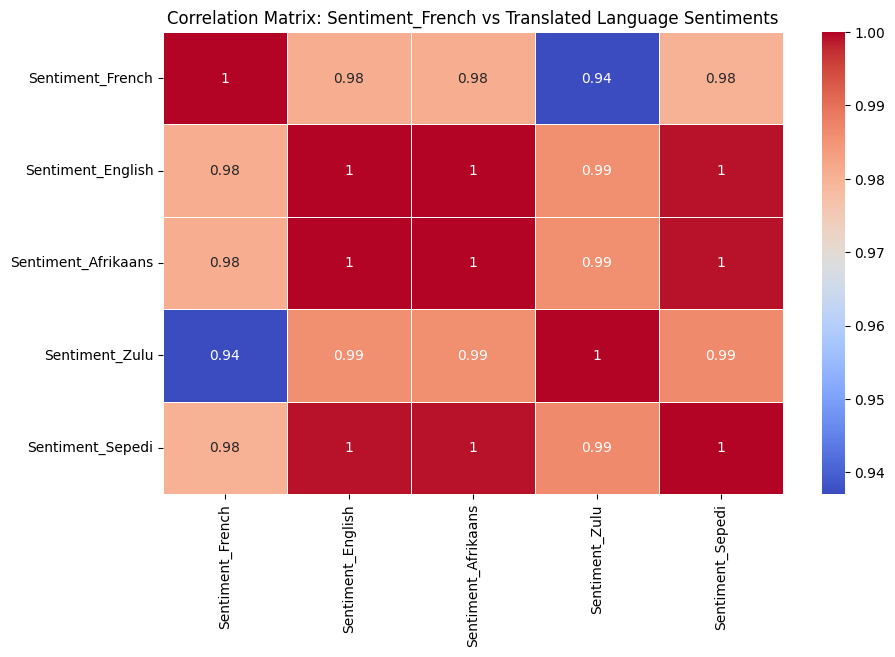

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Sentiment_French vs Translated Language Sentiments')
plt.show()


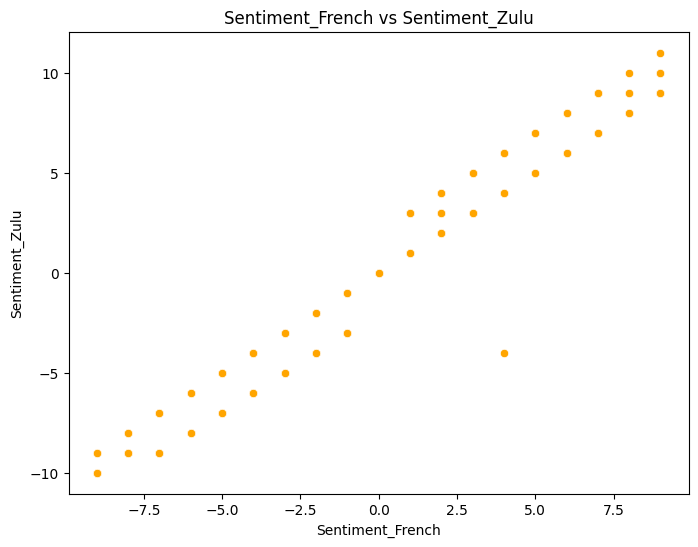

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ai_df, x='Sentiment_French', y='Sentiment_Zulu', color='orange')
plt.title('Sentiment_French vs Sentiment_Zulu')
plt.xlabel('Sentiment_French')
plt.ylabel('Sentiment_Zulu')
plt.show()


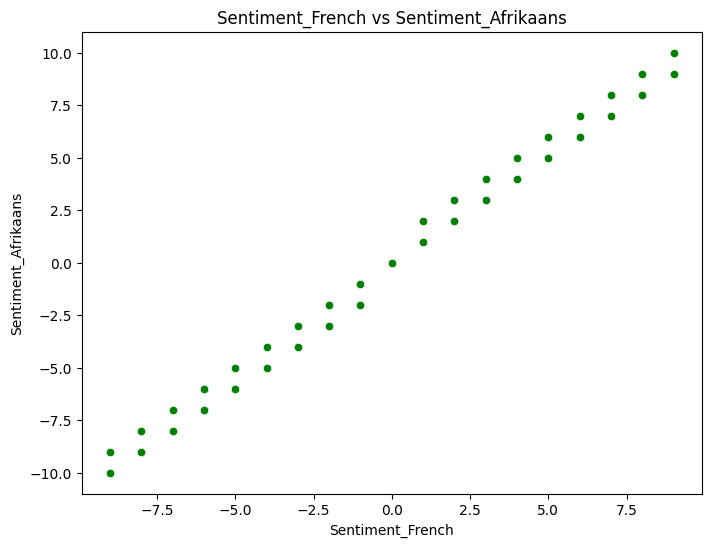

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ai_df, x='Sentiment_French', y='Sentiment_Afrikaans', color='green')
plt.title('Sentiment_French vs Sentiment_Afrikaans')
plt.xlabel('Sentiment_French')
plt.ylabel('Sentiment_Afrikaans')
plt.show()


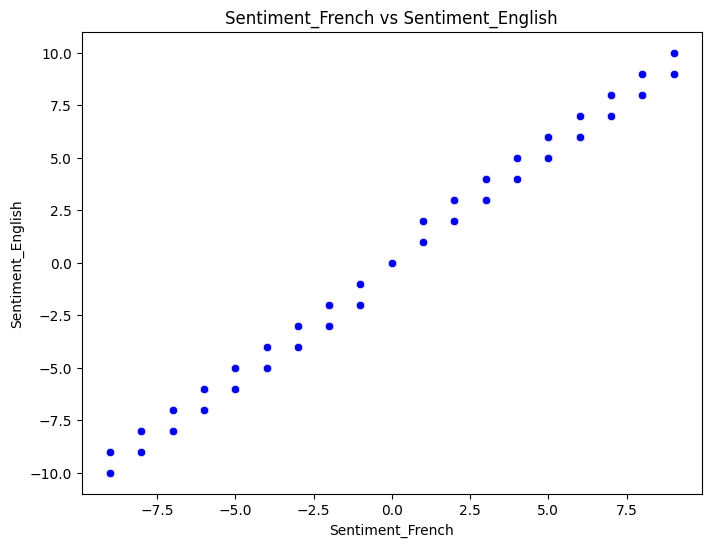

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ai_df, x='Sentiment_French', y='Sentiment_English', color='blue')
plt.title('Sentiment_French vs Sentiment_English')
plt.xlabel('Sentiment_French')
plt.ylabel('Sentiment_English')
plt.show()


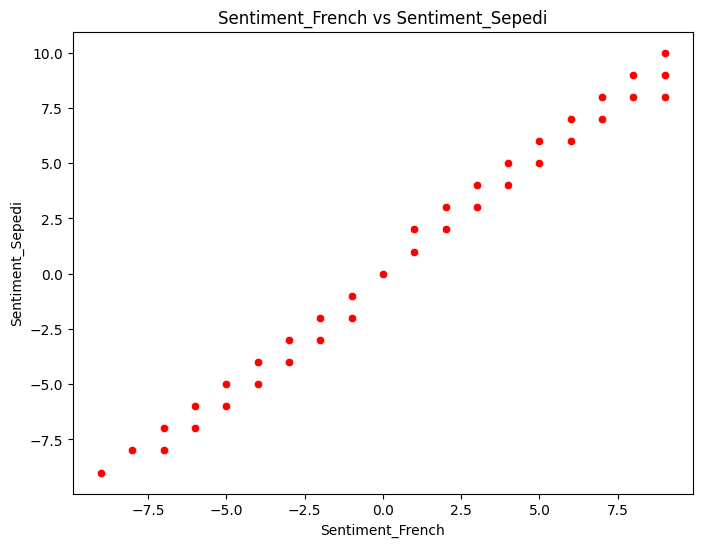

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ai_df, x='Sentiment_French', y='Sentiment_Sepedi', color='red')
plt.title('Sentiment_French vs Sentiment_Sepedi')
plt.xlabel('Sentiment_French')
plt.ylabel('Sentiment_Sepedi')
plt.show()


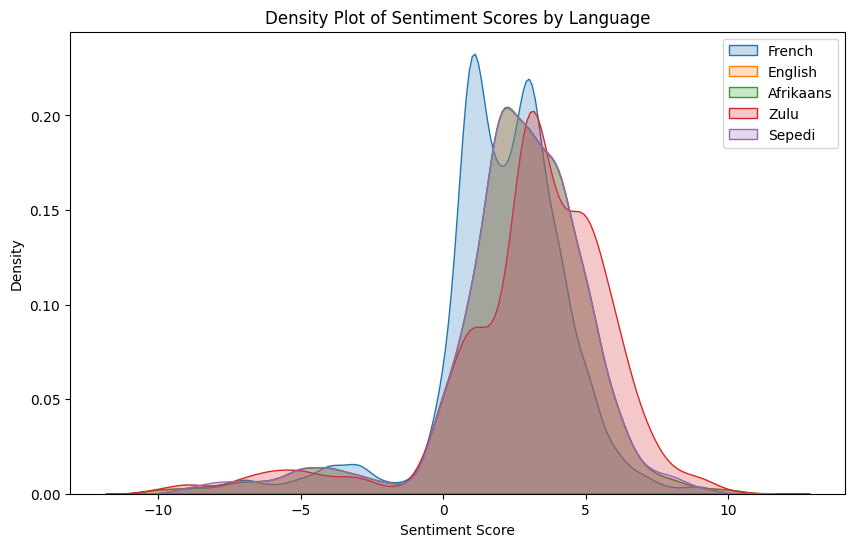

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ai_df, x='Sentiment_French', label='French', fill=True)
sns.kdeplot(data=ai_df, x='Sentiment_English', label='English', fill=True)
sns.kdeplot(data=ai_df, x='Sentiment_Afrikaans', label='Afrikaans', fill=True)
sns.kdeplot(data=ai_df, x='Sentiment_Zulu', label='Zulu', fill=True)
sns.kdeplot(data=ai_df, x='Sentiment_Sepedi', label='Sepedi', fill=True)
plt.title('Density Plot of Sentiment Scores by Language')
plt.xlabel('Sentiment Score')
plt.legend()
plt.show()


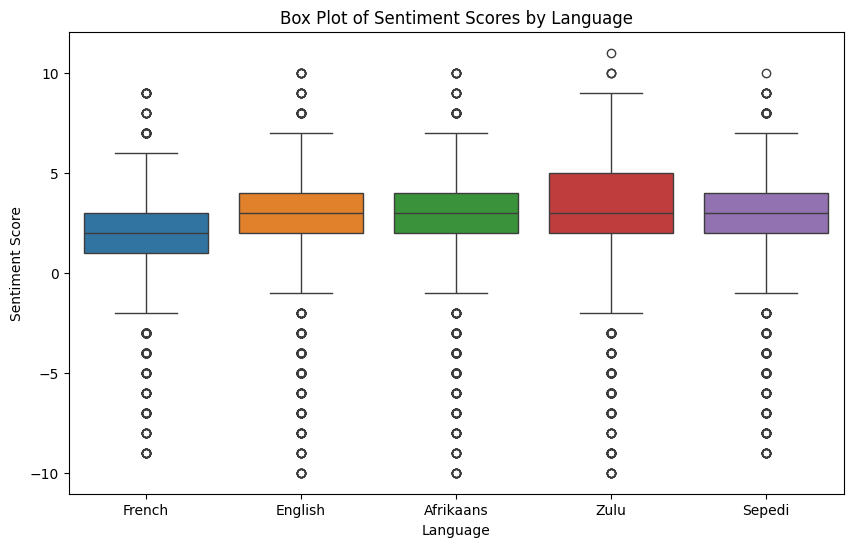

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ai_df[['Sentiment_French', 'Sentiment_English', 'Sentiment_Afrikaans', 'Sentiment_Zulu', 'Sentiment_Sepedi']])
plt.title('Box Plot of Sentiment Scores by Language')
plt.xlabel('Language')
plt.ylabel('Sentiment Score')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['French', 'English', 'Afrikaans', 'Zulu', 'Sepedi'])
plt.show()


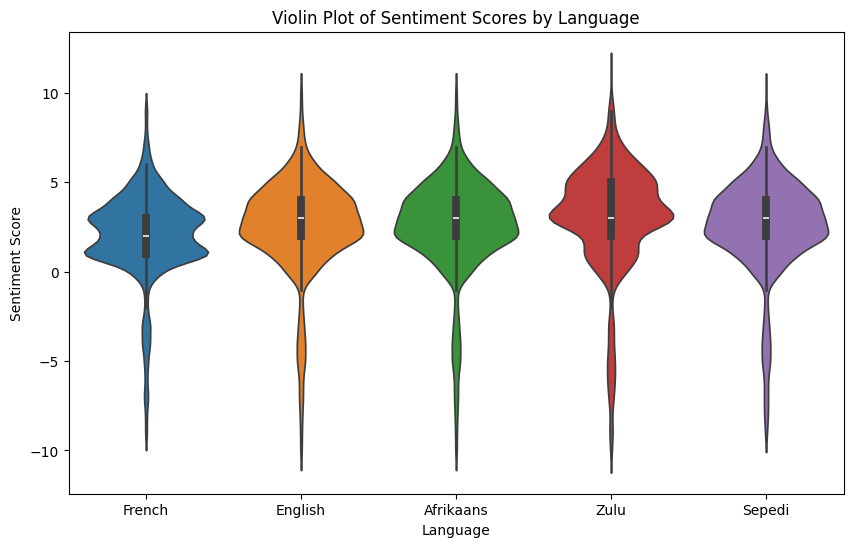

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=ai_df[['Sentiment_French', 'Sentiment_English', 'Sentiment_Afrikaans', 'Sentiment_Zulu', 'Sentiment_Sepedi']])
plt.title('Violin Plot of Sentiment Scores by Language')
plt.xlabel('Language')
plt.ylabel('Sentiment Score')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['French', 'English', 'Afrikaans', 'Zulu', 'Sepedi'])
plt.show()


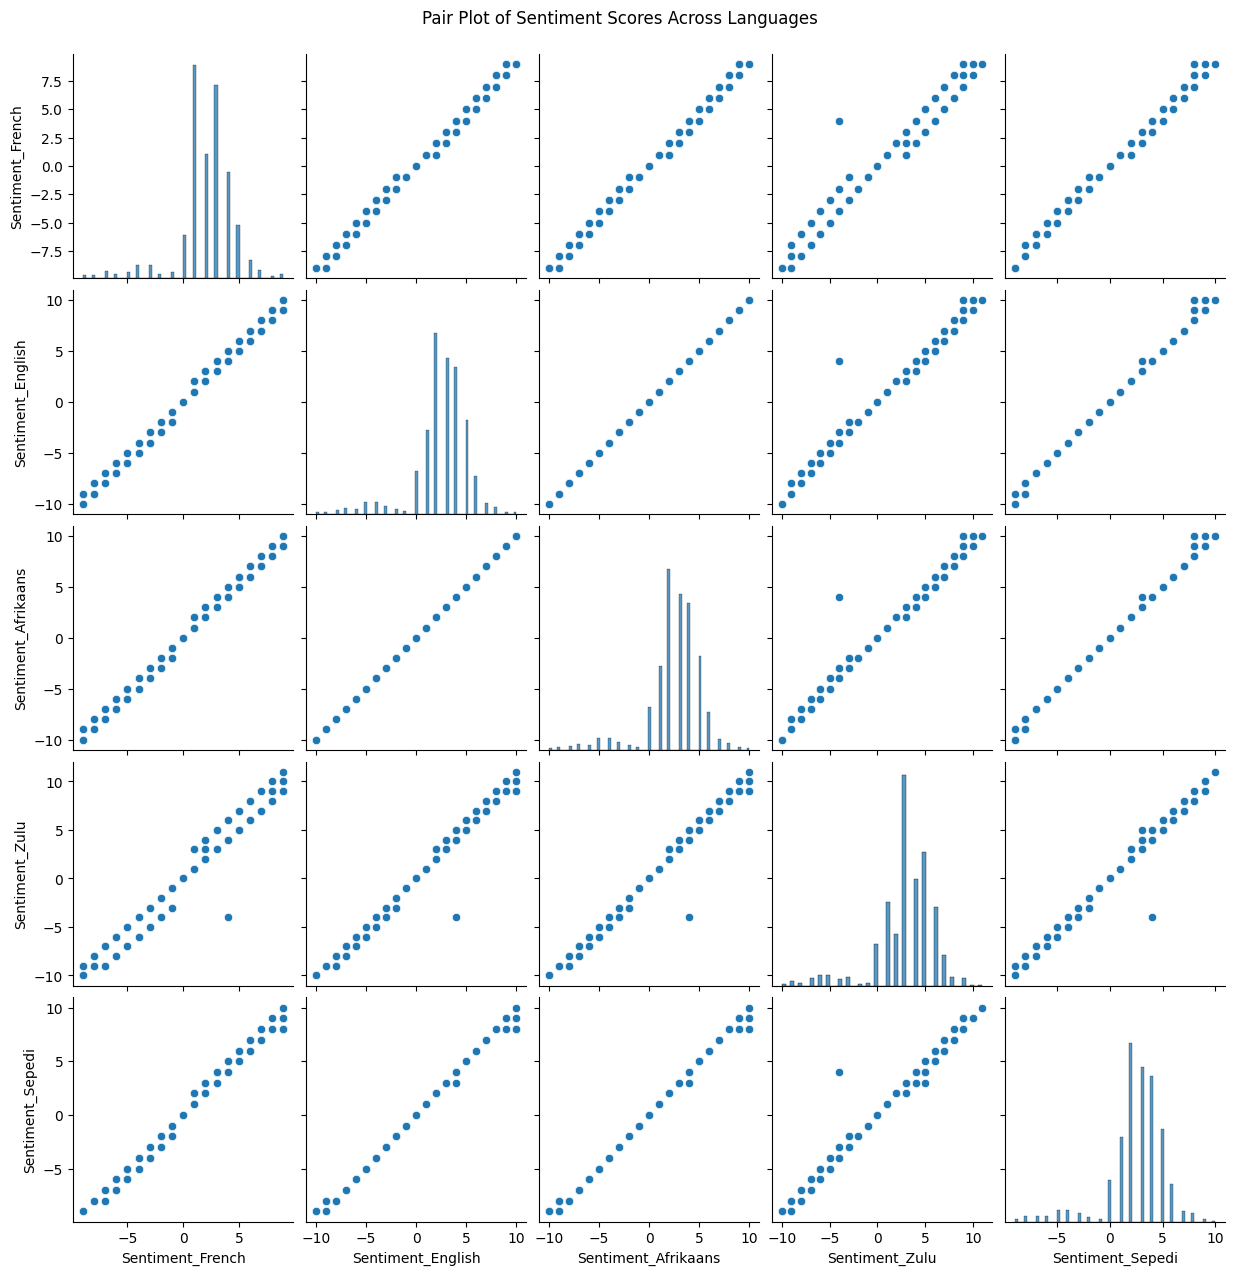

In [ ]:
sns.pairplot(ai_df[['Sentiment_French', 'Sentiment_English', 'Sentiment_Afrikaans', 'Sentiment_Zulu', 'Sentiment_Sepedi']])
plt.suptitle('Pair Plot of Sentiment Scores Across Languages', y=1.02)
plt.show()


<ipython-input-54-28d0d2232ccc>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  average_sentiment = np.concatenate((average_sentiment, [average_sentiment[0]]))  # Close the loop


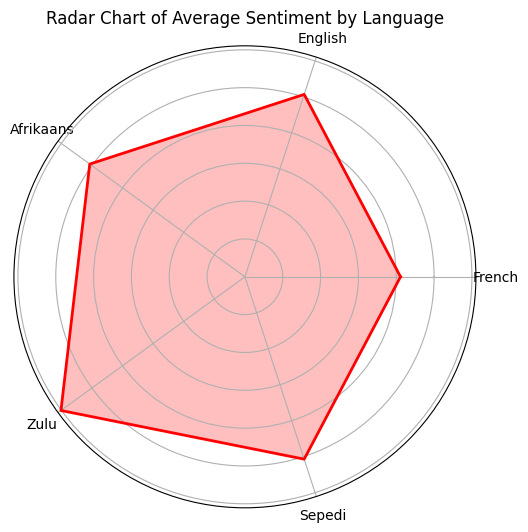

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average sentiment for each language
average_sentiment = ai_df[['Sentiment_French', 'Sentiment_English', 'Sentiment_Afrikaans', 'Sentiment_Zulu', 'Sentiment_Sepedi']].mean()

# Data preparation for radar chart
labels = ['French', 'English', 'Afrikaans', 'Zulu', 'Sepedi']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
average_sentiment = np.concatenate((average_sentiment, [average_sentiment[0]]))  # Close the loop
angles += angles[:1]

# Plot the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, average_sentiment, color='red', alpha=0.25)
ax.plot(angles, average_sentiment, color='red', linewidth=2)
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Radar Chart of Average Sentiment by Language')
plt.show()


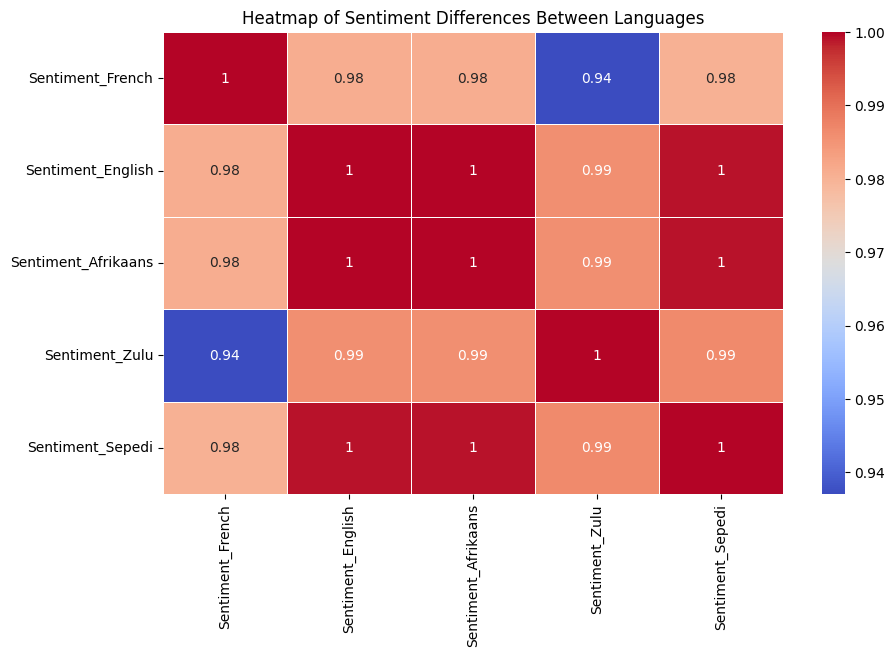

In [ ]:
# Calculate pairwise sentiment differences
sentiment_diff_matrix = ai_df[['Sentiment_French', 'Sentiment_English', 'Sentiment_Afrikaans', 'Sentiment_Zulu', 'Sentiment_Sepedi']].apply(lambda x: x - x.mean())

# Plot heatmap of sentiment differences
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_diff_matrix.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Sentiment Differences Between Languages')
plt.show()


<ipython-input-56-2697079d51c3>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sentiment_categories = ai_df[['Sentiment_French', 'Sentiment_English', 'Sentiment_Afrikaans', 'Sentiment_Zulu', 'Sentiment_Sepedi']].applymap(


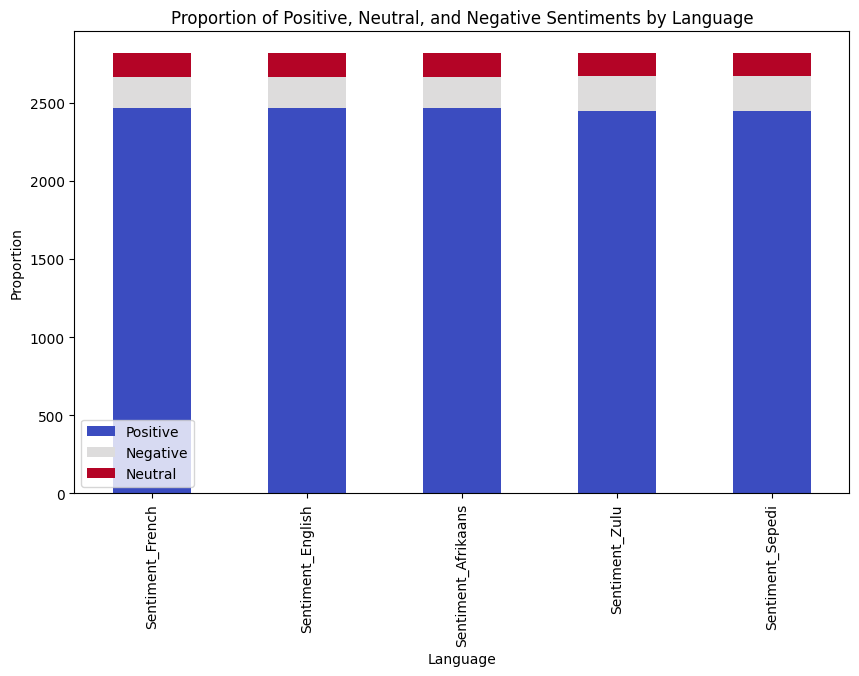

In [ ]:
# Categorize sentiment into positive, neutral, and negative
sentiment_categories = ai_df[['Sentiment_French', 'Sentiment_English', 'Sentiment_Afrikaans', 'Sentiment_Zulu', 'Sentiment_Sepedi']].applymap(
    lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative'
)

# Count the proportions
sentiment_proportions = sentiment_categories.apply(pd.Series.value_counts).T

# Plot a stacked bar chart
sentiment_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Proportion of Positive, Neutral, and Negative Sentiments by Language')
plt.ylabel('Proportion')
plt.xlabel('Language')
plt.show()
